In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
def process(recording):
    integration = 8371
    fs = 2.9296875e6/35/integration
    x = np.fromfile(f'2020/carrier_{recording:04d}.c64', 'complex64')
    pwr = np.fromfile(f'2020/carrier_wide_power_{recording:04d}.f32', 'float32')
    plt.figure()
    t = np.arange(x.size)*0.1
    plt.plot(t, x.imag, '.', color='C1', label='Q')
    plt.plot(t, x.real, '.', color='C0', label='I')
    plt.title('PLL output integrated coherently to 10 Hz')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    avg = 10
    sel = slice(6, None)
    sig_pwr = np.abs(x/integration)**2
    sig_pwr = np.average(sig_pwr[:sig_pwr.size//avg*avg].reshape((-1, avg)), axis=1)
    tot_pwr = pwr/integration
    tot_pwr = np.average(tot_pwr[:tot_pwr.size//avg*avg].reshape((-1, avg)), axis=1)
    t = np.arange(sig_pwr.size)*(fs/avg)
    noise_bw = 10e3
    sig_bw = 10
    noise_pwr = (tot_pwr - sig_pwr)*noise_bw/(noise_bw - sig_bw)
    snr = (sig_pwr - noise_pwr*sig_bw/noise_bw) / noise_pwr
    plt.figure()
    plt.plot(t[sel], 10*np.log10(snr[sel]*noise_bw))
    plt.title('Residual carrier CN0')
    plt.xlabel('Time (s)')
    plt.ylabel('CN0 (dB)')

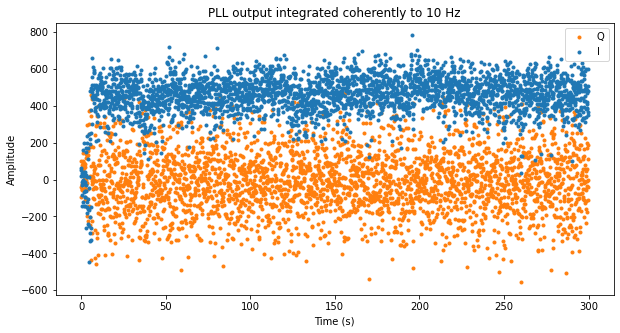

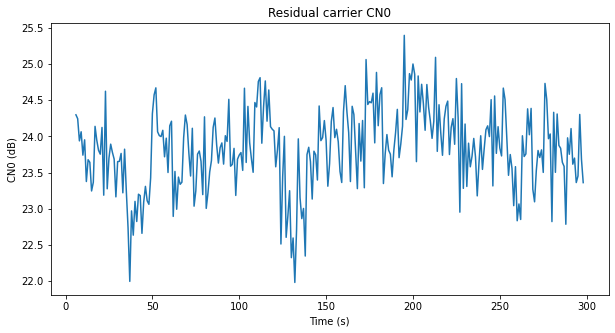

In [3]:
process(11)

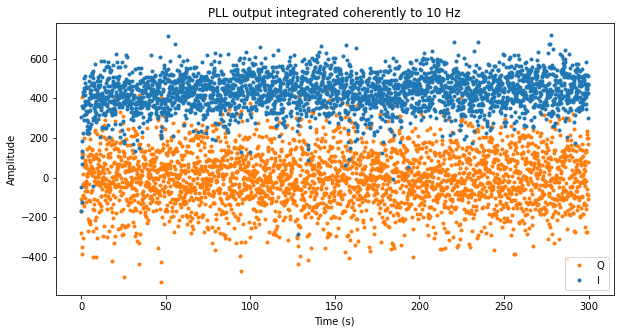

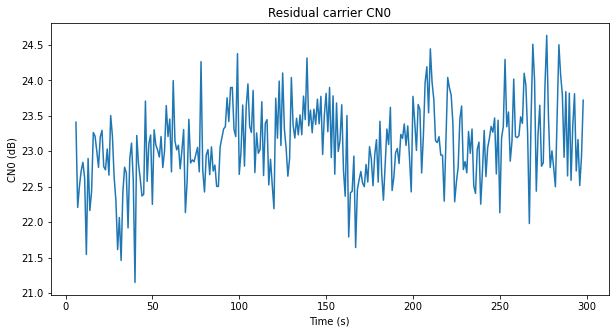

In [4]:
process(15)